In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [128]:
bank=pd.read_csv('bank_full.csv')

In [129]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [130]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [131]:
bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

 Observation : There are no null values in the data set 

In [132]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observation : -ve values in  account balance column is acceptable ,so no need to change the -ve values

In [133]:
#-1 in pdays tells us the person has not been contacted or contact period is beyond 900 days or 1st time being contacted .
#Since all other values in that column reflect the actual number of days ,we are converting -1 to actual days
bank['pdays'] = bank['pdays'].replace(-1,900)
bank['pdays'].value_counts()

900    36954
182      167
92       147
91       126
183      126
       ...  
749        1
717        1
589        1
493        1
32         1
Name: pdays, Length: 559, dtype: int64

In [134]:
neg_count = len(list(filter(lambda x: (x < 0), bank['pdays']))) 
print("Negative numbers in pdays: ", neg_count) 

Negative numbers in pdays:  0


In [135]:
for i in bank.columns:
    print()
    print(i)
    print(bank[i].value_counts())
          


age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

default
no     44396
yes      815
Name: default, dtype: int64

balance
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

housing
yes    25130
no     20081
Name: housing, dtype: int64

loan


# Univariate and Bivariate analysis

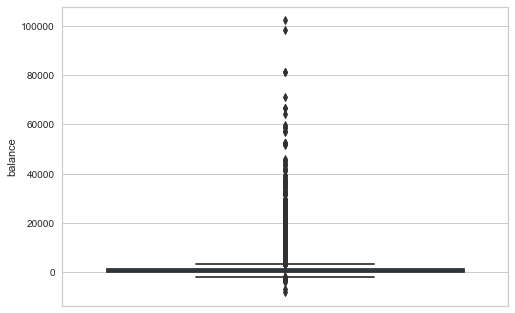

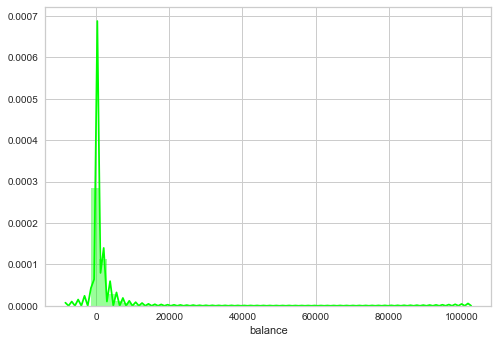

In [136]:
sns.boxplot(bank['balance'],orient='v')
plt.show()
sns.distplot(bank['balance'],color='lime')
plt.show()


Observation :There are outliers in blalnce columns 

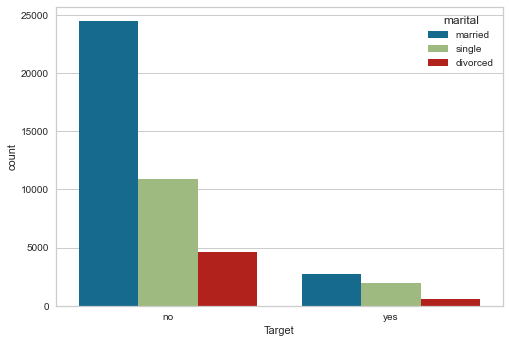

In [137]:
#sns.boxplot(y='marital',x='Target',data=bank)
#sns.countplot(bank['Target'])
sns.countplot(bank['Target'], hue = bank['marital'])
plt.show()

marital status do not seems to have an relation on subscribing a term deposit

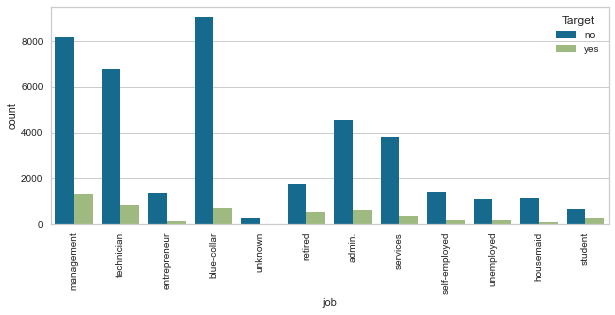

In [138]:
plt.figure(figsize=(10,4))
q7year=sns.countplot(bank['job'], hue = bank['Target'])
q7year.set_xticklabels(q7year.get_xticklabels(), rotation=90);
plt.show()

job status do not seems to have an impact on subscribing a term deposit 

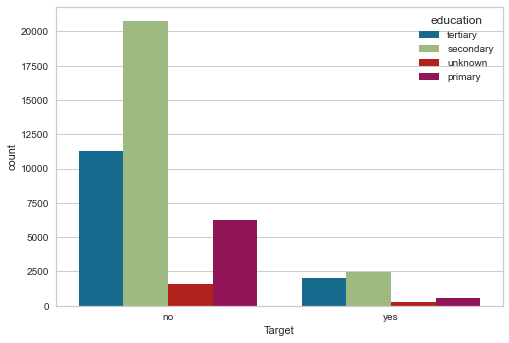

In [139]:
sns.countplot(bank['Target'], hue = bank['education'])
plt.show()

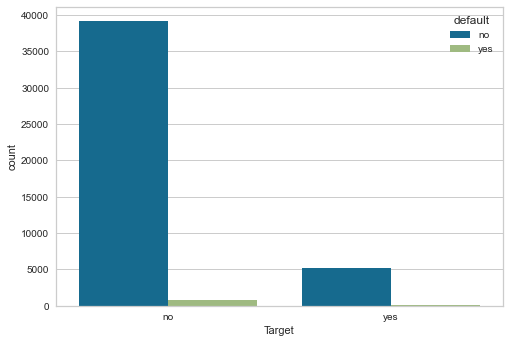

In [140]:
sns.countplot(bank['Target'], hue = bank['default'])
plt.show()

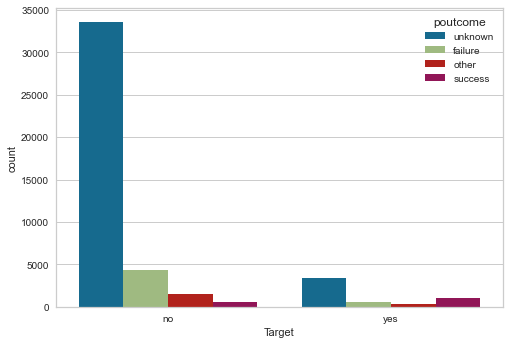

In [141]:
sns.countplot(bank['Target'], hue = bank['poutcome'])
plt.show()

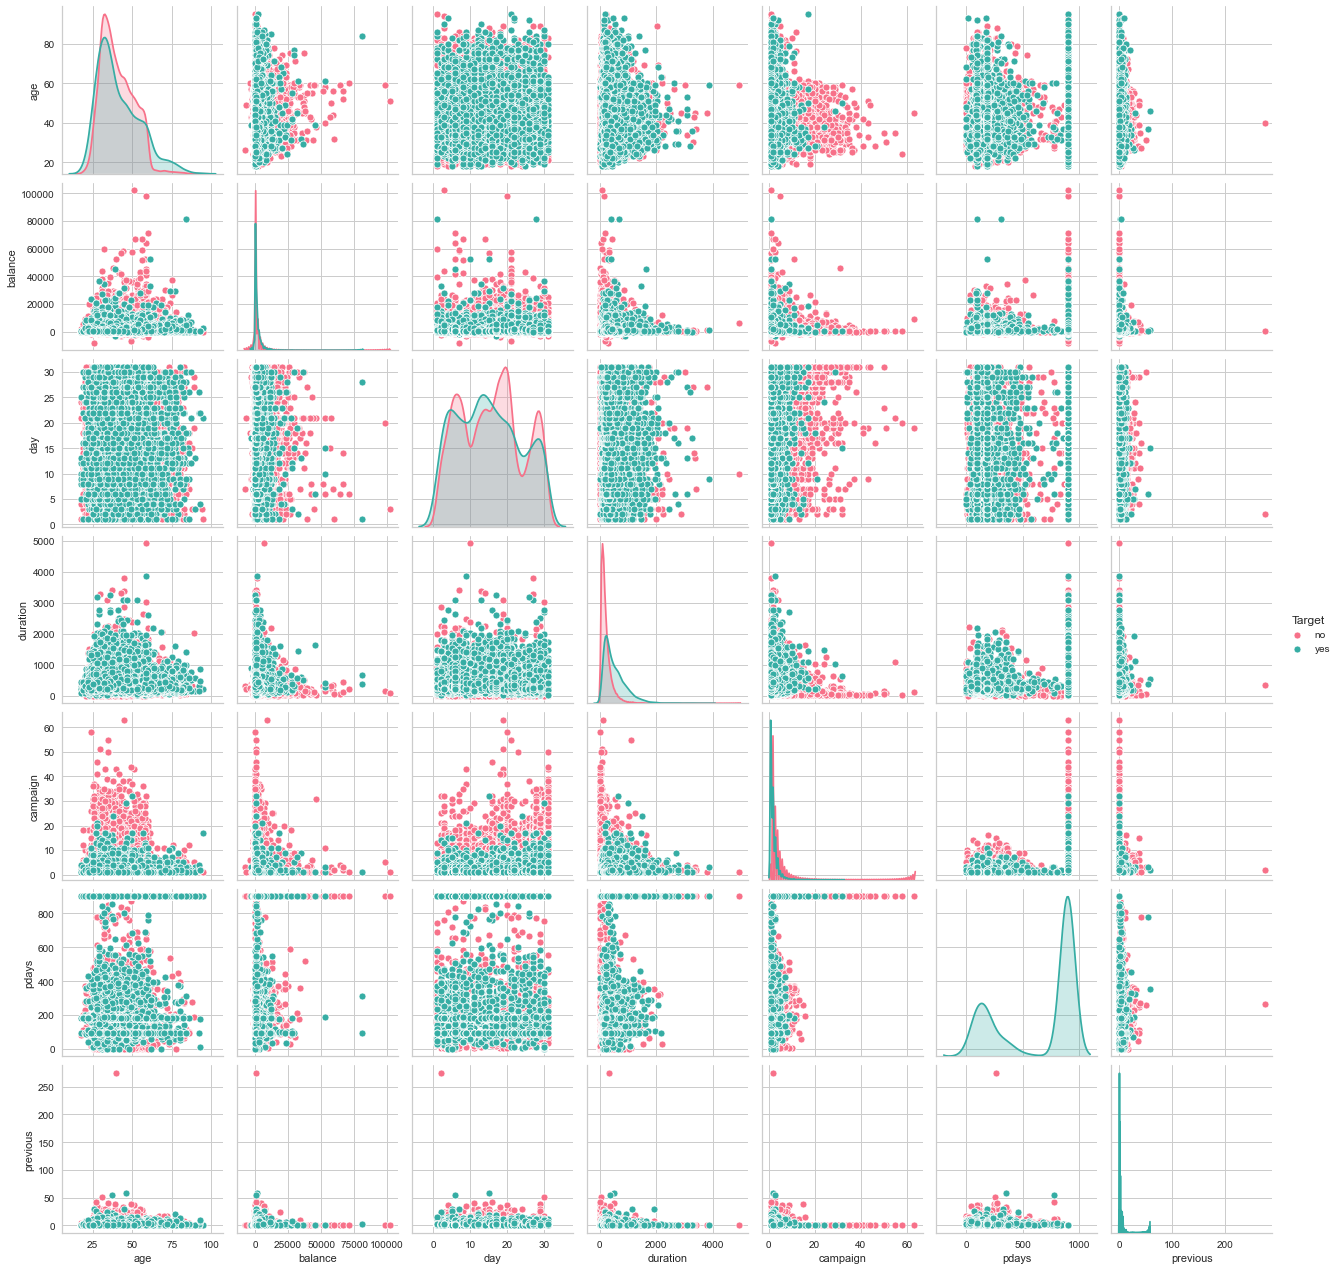

In [142]:
sns.pairplot(bank,hue="Target", palette="husl")

Observations: There are no linear relationships between any two variables. 

In [143]:
#replace target column values no=0 and yes=1
bank['Target'] = bank['Target'].replace('no',0)
bank['Target'] = bank['Target'].replace('yes',1)
bank['Target']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int64

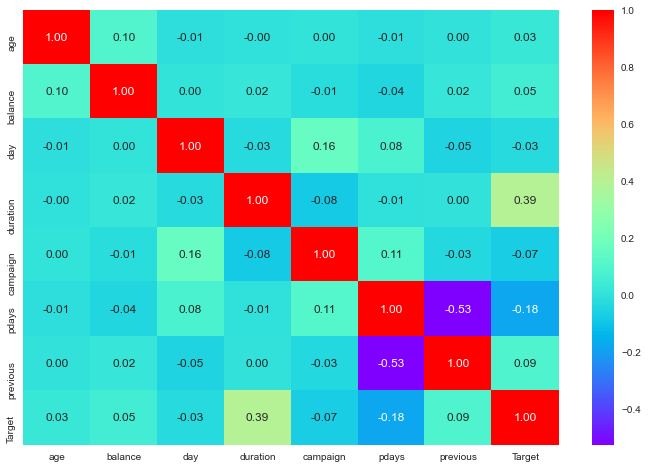

In [144]:
plt.figure(figsize=(12,8))
sns.heatmap(bank.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

Observations:
There is no strong correlation between any two variables. There is no strong correlation between any independent variable and Target variable.

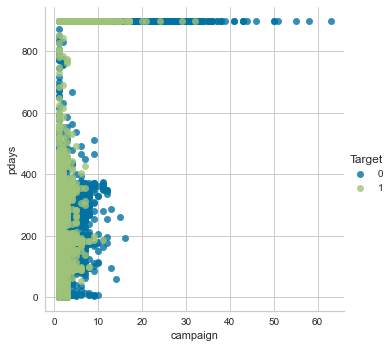

In [145]:
sns.lmplot(x='campaign',y='pdays',data=bank,fit_reg=False,hue='Target')
plt.show()

# Data Model 

In [146]:
bank = pd.get_dummies(bank, columns=['job'])
bank = pd.get_dummies(bank, columns=['marital'])
bank = pd.get_dummies(bank, columns=['education'])
bank = pd.get_dummies(bank, columns=['default'])
bank = pd.get_dummies(bank, columns=['housing'])
bank = pd.get_dummies(bank, columns=['loan'])
bank = pd.get_dummies(bank, columns=['contact'])
bank = pd.get_dummies(bank, columns=['month'])
bank = pd.get_dummies(bank, columns=['poutcome'])
bank.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,900,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Spliting the data

In [147]:
from sklearn.model_selection import train_test_split
x=bank.drop('Target',axis=1)
y=bank['Target']
xtrain,xtest,ytrain,ytest =train_test_split(x, y, test_size=0.3, random_state=1)

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform (xtest)

# Logistic regression

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [150]:
lrmodel=LogisticRegression(random_state=1)
lrmodel.fit(xtrain,ytrain)

LogisticRegression(random_state=1)

In [151]:
ypredict = lrmodel.predict(xtest)

Confusion Matrix


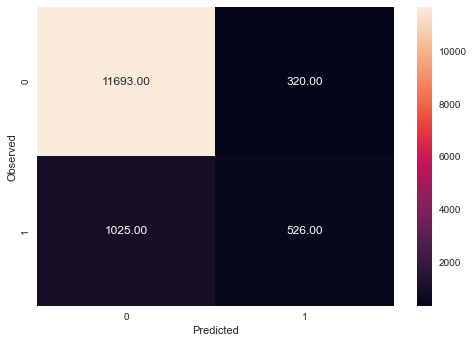

None


In [152]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
print('Confusion Matrix')
print(draw_cm(ytest,ypredict))

In [153]:
print("Trainig accuracy",lrmodel.score(xtrain,ytrain))  
print("Testing accuracy",lrmodel.score(xtest, ytest))
print()
print("Recall:",recall_score(ytest,ypredict))
print("Precision:",precision_score(ytest,ypredict))
print("F1 Score:",f1_score(ytest,ypredict))
print("Roc Auc Score:",roc_auc_score(ytest,ypredict))

Trainig accuracy 0.9028975890289759
Testing accuracy 0.9008404600412857

Recall: 0.33913604126370084
Precision: 0.6217494089834515
F1 Score: 0.4388819357530246
Roc Auc Score: 0.6562491161117472


In [154]:
acc_DT = lrmodel.score(xtest, ytest)

In [155]:
accuracyDf = pd.DataFrame({'Method':['Logistic regression'], 'accuracy': acc_DT})
accuracyDf

,Method,accuracy
0,Logistic regression,0.90084


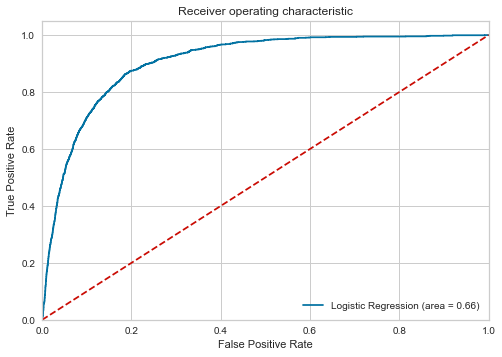

In [156]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(ytest, lrmodel.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, lrmodel.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Observation:
true positives (TP-11): we predicted they are more likely to subscribe term deposit and they did 

false positives(FP-01): We predicted they will subscribe , but they did not subscribe

true negatives (TN-00): We predicted they will not subscribe and they did not 

false negatives (FN-10): We predicted they will not subscribe, but they did subscribe. 

Since False negative is high bank will loose potential customers who are  more likely to subscribe term deposit. 
So recall is importanat metrics and we shoudl try to reduce that 
 


# Decision Tree -- entropy

In [157]:
from sklearn.tree import DecisionTreeClassifier
dtreemodel_entropy = DecisionTreeClassifier(criterion='entropy')
dtreemodel_entropy.fit(xtrain,ytrain) 

DecisionTreeClassifier(criterion='entropy')

In [158]:
dtreemodel_entropy.score(xtrain,ytrain)

1.0

In [159]:
dtreemodel_entropy.score(xtest,ytest)

0.8757741079327632

In [160]:
preds_train = dtreemodel_entropy.predict(xtrain)
preds_test = dtreemodel_entropy.predict(xtest)
acc_DT = accuracy_score(ytest,preds_test)

In [161]:
#accuracyDf = pd.DataFrame({'Method':['Decision Tree -entropy'], 'accuracy': acc_DT})
#accuracyDf

accuracyDf_temp = pd.DataFrame({'Method':['Decision Tree -entropy'], 'accuracy': acc_DT})
accuracyDf = pd.concat([accuracyDf,accuracyDf_temp])
accuracyDf

,Method,accuracy
0,Logistic regression,0.900840
0,Decision Tree -entropy,0.875774


In [162]:
# pruning to remove overfitting 
dtreemodel_entropy_prune = DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_leaf=5)
dtreemodel_entropy_prune.fit(xtrain,ytrain) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [163]:
dtreemodel_entropy_prune.score(xtrain,ytrain)

0.8997693304262647

In [164]:
dtreemodel_entropy_prune.score(xtest,ytest)

0.9014302565614863

In [165]:
preds_train = dtreemodel_entropy_prune.predict(xtrain)
preds_test = dtreemodel_entropy_prune.predict(xtest)
acc_DT = accuracy_score(ytest,preds_test)

In [166]:
acc_DT

0.9014302565614863

In [167]:
accuracyDf_temp = pd.DataFrame({'Method':['Pruned Decision Tree -entropy'], 'accuracy': acc_DT})
accuracyDf = pd.concat([accuracyDf,accuracyDf_temp])
accuracyDf

,Method,accuracy
0,Logistic regression,0.900840
0,Decision Tree -entropy,0.875774
0,Pruned Decision Tree -entropy,0.901430


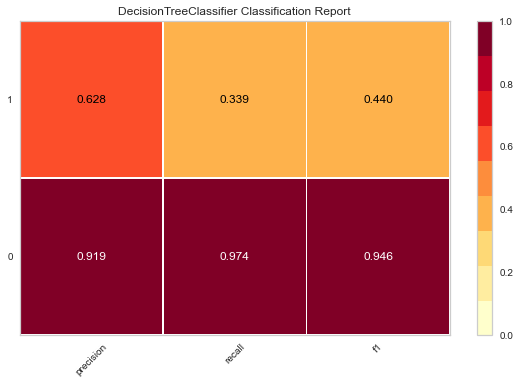

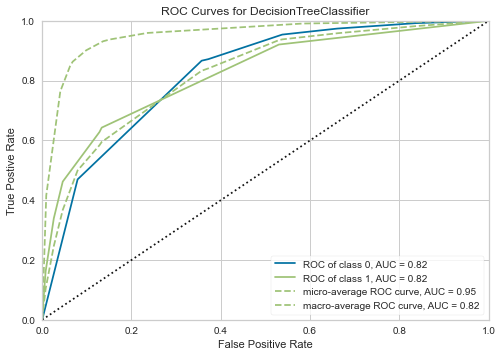

In [168]:
# Visualize model performance with yellowbrick library
from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(dtreemodel_entropy_prune)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(dtreemodel_entropy_prune)
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

# Decision Tree -- gini

In [169]:
from sklearn.tree import DecisionTreeClassifier
dtreemodel_gini = DecisionTreeClassifier(criterion='gini')
dtreemodel_gini.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [170]:
dtreemodel_gini.score(xtrain,ytrain)

1.0

In [171]:
dtreemodel_gini.score(xtest,ytest)

0.8768799764081392

In [172]:
preds_train = dtreemodel_gini.predict(xtrain)
preds_test = dtreemodel_gini.predict(xtest)
acc_DT = accuracy_score(ytest,preds_test)

In [173]:
preds_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [174]:
acc_DT

0.8768799764081392

In [175]:
accuracyDf_temp = pd.DataFrame({'Method':['Decision Tree -gini'], 'accuracy': acc_DT})
accuracyDf = pd.concat([accuracyDf,accuracyDf_temp])
accuracyDf

,Method,accuracy
0,Logistic regression,0.900840
0,Decision Tree -entropy,0.875774
0,Pruned Decision Tree -entropy,0.901430
0,Decision Tree -gini,0.876880


In [176]:
#prune for overfitting
dtreemodel_gini_prune = DecisionTreeClassifier(criterion='gini',max_depth = 3, min_samples_leaf=5)
dtreemodel_gini_prune.fit(xtrain,ytrain) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [177]:
dtreemodel_gini_prune.score(xtrain,ytrain)

0.9005276961481341

In [178]:
dtreemodel_gini_prune.score(xtest,ytest)

0.9019463285166618

In [179]:
preds_train = dtreemodel_gini_prune.predict(xtrain)
preds_test = dtreemodel_gini_prune.predict(xtest)
acc_DT = accuracy_score(ytest,preds_test)

In [180]:
acc_DT

0.9019463285166618

In [181]:
accuracyDf_temp = pd.DataFrame({'Method':['Pruned Decision Tree -gini'], 'accuracy': acc_DT})
accuracyDf = pd.concat([accuracyDf,accuracyDf_temp])
accuracyDf

,Method,accuracy
0,Logistic regression,0.900840
0,Decision Tree -entropy,0.875774
0,Pruned Decision Tree -entropy,0.901430
0,Decision Tree -gini,0.876880
0,Pruned Decision Tree -gini,0.901946


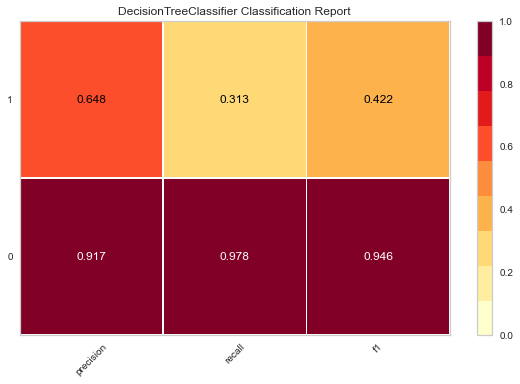

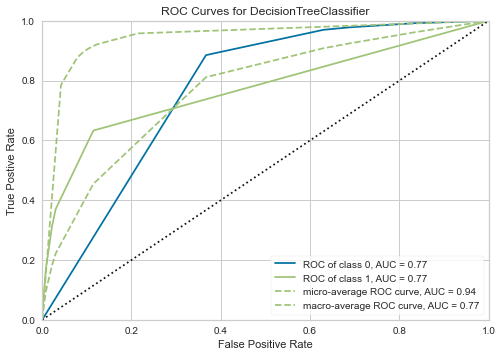

In [182]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(dtreemodel_gini_prune)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(dtreemodel_gini_prune)
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

# Bagging

In [183]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples=0.7,oob_score=True, random_state=22)
bgcl.fit(xtrain,ytrain)

pred_BG = bgcl.predict(xtest)
acc_BG = accuracy_score(ytest,pred_BG)

In [184]:
accuracyDf_temp = pd.DataFrame({'Method':['Bagging'], 'accuracy': acc_BG})
accuracyDf = pd.concat([accuracyDf,accuracyDf_temp])
accuracyDf

,Method,accuracy
0,Logistic regression,0.900840
0,Decision Tree -entropy,0.875774
0,Pruned Decision Tree -entropy,0.901430
0,Decision Tree -gini,0.876880
0,Pruned Decision Tree -gini,0.901946
0,Bagging,0.905854


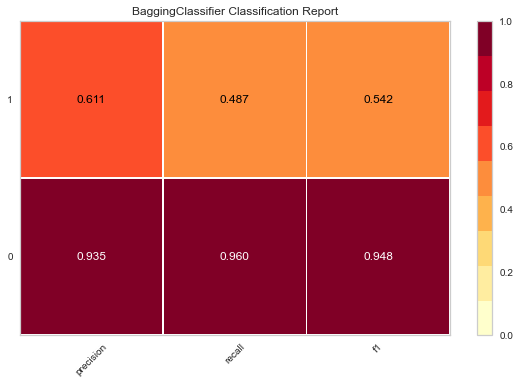

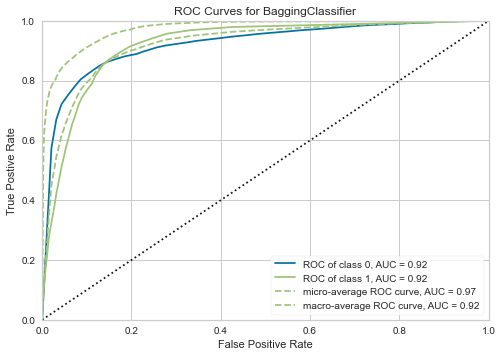

In [185]:
viz = ClassificationReport(bgcl)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(bgcl)
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

# Adaboost Classifier

In [186]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=22)
abcl.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.1, random_state=22)

In [187]:
pred_AB = abcl.predict(xtest)
acc_AB = accuracy_score(ytest,pred_AB)

In [188]:
accuracyDf_temp = pd.DataFrame({'Method':['Adaboost'], 'accuracy': acc_AB})
accuracyDf = pd.concat([accuracyDf,accuracyDf_temp])
accuracyDf

,Method,accuracy
0,Logistic regression,0.900840
0,Decision Tree -entropy,0.875774
0,Pruned Decision Tree -entropy,0.901430
0,Decision Tree -gini,0.876880
0,Pruned Decision Tree -gini,0.901946
0,Bagging,0.905854
0,Adaboost,0.890372


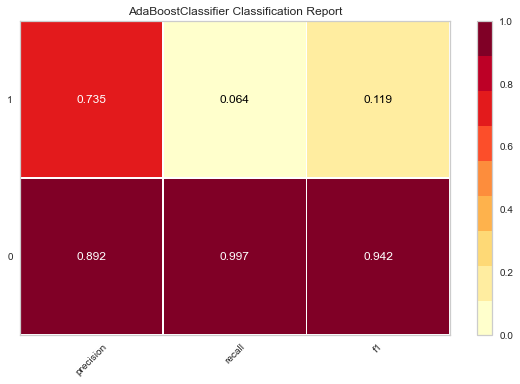

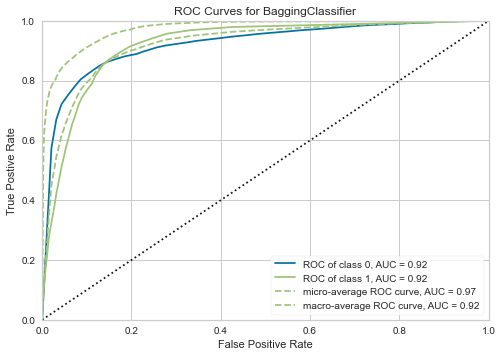

In [189]:
viz = ClassificationReport(abcl)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(bgcl)
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

# Gradient Boost

In [190]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=22)
gbcl.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=50, random_state=22)

In [191]:
pred_GB = gbcl.predict(xtest)
acc_GB = accuracy_score(ytest, pred_GB)

In [192]:
accuracyDf_temp = pd.DataFrame({'Method':['Gradientboost'], 'accuracy': acc_GB})
accuracyDf = pd.concat([accuracyDf,accuracyDf_temp])
accuracyDf

,Method,accuracy
0,Logistic regression,0.900840
0,Decision Tree -entropy,0.875774
0,Pruned Decision Tree -entropy,0.901430
0,Decision Tree -gini,0.876880
0,Pruned Decision Tree -gini,0.901946
0,Bagging,0.905854
0,Adaboost,0.890372
0,Gradientboost,0.904306


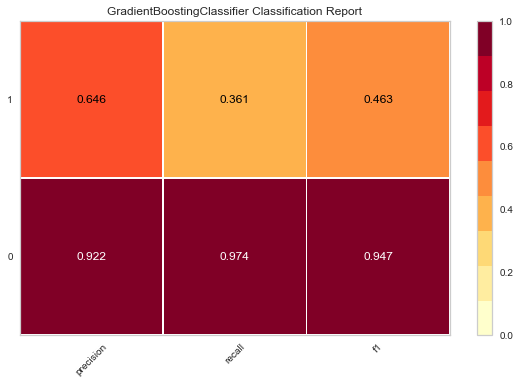

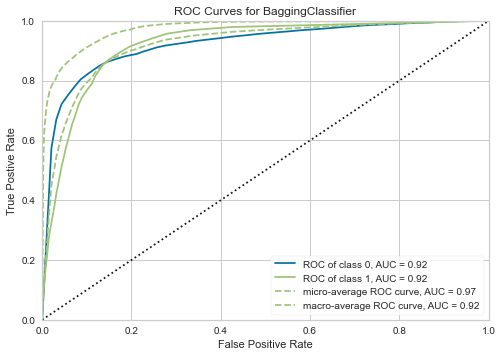

In [193]:
viz = ClassificationReport(gbcl)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(bgcl)
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

# Random Forest Classifier

In [194]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=50)
rfcl.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=50)

In [195]:
pred_RF = rfcl.predict(xtest)
acc_RF = accuracy_score(ytest,pred_RF)

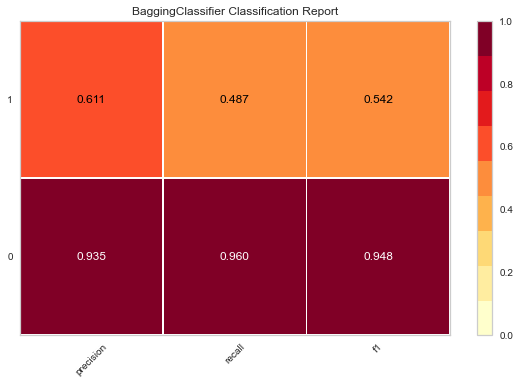

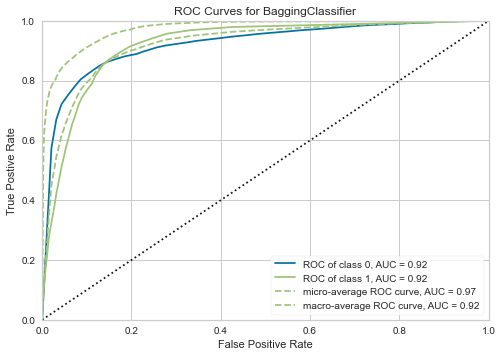

In [196]:
viz = ClassificationReport(bgcl)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(bgcl)
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

In [197]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = x.columns))

                          Imp
age                  0.092557
balance              0.092785
day                  0.079656
duration             0.265717
campaign             0.038098
pdays                0.039197
previous             0.020364
job_admin.           0.009161
job_blue-collar      0.008639
job_entrepreneur     0.003381
job_housemaid        0.002860
job_management       0.010636
job_retired          0.005299
job_self-employed    0.004150
job_services         0.006088
job_student          0.004579
job_technician       0.010469
job_unemployed       0.004400
job_unknown          0.001169
marital_divorced     0.007350
marital_married      0.011316
marital_single       0.010043
education_primary    0.007465
education_secondary  0.012032
education_tertiary   0.011675
education_unknown    0.005422
default_no           0.001157
default_yes          0.001081
housing_no           0.011329
housing_yes          0.013861
loan_no              0.006293
loan_yes             0.006748
contact_ce

Observation : Every attribute seems to have small influence on the prediction

In [198]:
accuracyDf_temp = pd.DataFrame({'Method':['Random Forest'], 'accuracy': acc_RF})
accuracyDf = pd.concat([accuracyDf,accuracyDf_temp])
accuracyDf

,Method,accuracy
0,Logistic regression,0.900840
0,Decision Tree -entropy,0.875774
0,Pruned Decision Tree -entropy,0.901430
0,Decision Tree -gini,0.876880
0,Pruned Decision Tree -gini,0.901946
0,Bagging,0.905854
0,Adaboost,0.890372
0,Gradientboost,0.904306
0,Random Forest,0.907992


Observation : Without any parameter tuning the best model is Random forest since it gives higest accuracy